# Results

In [1]:
import os, json
import sys
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torch.nn as nn
import torch.utils
import torch.utils.data
from torch.backends import cudnn
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
## Set seed and cuda
gpu = 0
seed = 1
print("Set seed {}.".format(seed))

cuda = torch.cuda.is_available()
if cuda:
    print("cuda is available")
    device = torch.device('cuda', gpu)
else:
    print("cuda is not available")
    device = torch.device("cpu")
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
np.random.seed(seed)

Set seed 1.
cuda is available


In [3]:
tab_color_list = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
gray_color_list = ["k", "dimgray", "darkgray", "lightgray"]
linestyle_list = ["-", "--", ":", "-."]

## Comparison for Allen Dataset

### Regarding inflation

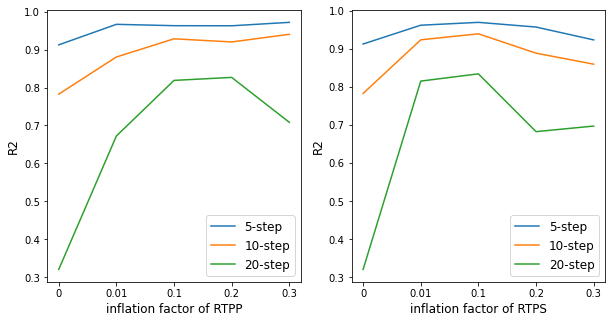

In [7]:
fs = 12
method_list = ["RTPP", "RTPS"]
factor_list = [0.01, 0.1, 0.2, 0.3]
pred_steps = 20
vis_steps = [5,10,20]
epoch = 2000
R2 = np.zeros((len(method_list), len(factor_list)+1, pred_steps))

R2[:,0] = np.load("../results/201118_EnKO_SVO_Allen_gs/imNone/R2.npy")[epoch-1]
for i, method in enumerate(method_list):
    for j, factor in enumerate(factor_list):
        R2[i,j+1] = np.load("../results/201118_EnKO_SVO_Allen_gs2/im{}if{}/R2.npy".format(method, factor))[epoch-1]

fig, ax = plt.subplots(1,2,figsize=(10,5))
for j, method in enumerate(method_list):
    for i, vis_step in enumerate(vis_steps):
        ax[j].plot(R2[j,:,vis_step-1], label="{}-step".format(vis_step))
    ax[j].set_xlabel("inflation factor of {}".format(method), size=fs)
    ax[j].set_ylabel("R2", size=fs)
    ax[j].set_xticks(range(5))
    ax[j].set_xticklabels([0] + factor_list)
    ax[j].legend(fontsize=fs)
fig.savefig("fig/R2_allen_if.pdf", bbox_inches="tight")

### Regarding Dz

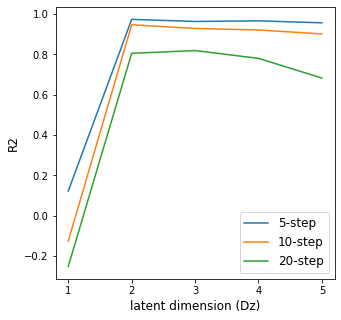

In [8]:
fs = 12
Dz_list = [1,2,3,4,5]
leng = len(Dz_list)
pred_steps = 20
vis_steps = [5, 10,20]
epoch = 2000
R2 = np.zeros((leng, pred_steps))

for i, Dz in enumerate(Dz_list):
    R2[i] = np.load("../results/201219_EnKO_SVO_Allen_gs/D{}/pred_evals.npy".format(Dz))[epoch-1,3]
R2[2] = np.load("../results/201118_EnKO_SVO_Allen_gs2/imRTPPif0.1/R2.npy")[epoch-1]
    
fig, ax = plt.subplots(1,1,figsize=(5,5))
for i, vis_step in enumerate(vis_steps):
    ax.plot(Dz_list, R2[:,vis_step-1], label="{}-step".format(vis_step))
ax.set_xlabel("latent dimension (Dz)", size=fs)
ax.set_ylabel("R2", size=fs)
ax.set_xticks(Dz_list)
ax.legend(fontsize=fs)
fig.savefig("fig/R2_allen_dz.pdf", bbox_inches="tight")

### Regarding n_particles

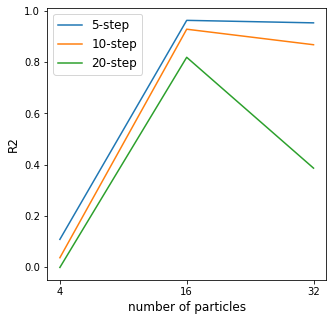

In [9]:
fs = 12
np_list = [4,16,32]
leng = len(np_list)
pred_steps = 20
vis_steps = [5,10,20]
epoch = 0
R2 = np.zeros((leng, pred_steps))

for i, n_particle in enumerate(np_list):
    R2[i] = np.load("../results/201219_EnKO_SVO_Allen_gs2/np{}/pred_evals.npy".format(n_particle))[epoch-1,3]
R2[1] = np.load("../results/201118_EnKO_SVO_Allen_gs2/imRTPPif0.1/R2.npy")[epoch-1]
    
fig, ax = plt.subplots(1,1,figsize=(5,5))
for i, vis_step in enumerate(vis_steps):
    ax.plot(R2[:,vis_step-1], label="{}-step".format(vis_step))
ax.set_xlabel("number of particles", size=fs)
ax.set_ylabel("R2", size=fs)
ax.set_xticks(range(leng))
ax.set_xticklabels(np_list)
ax.legend(fontsize=fs)
fig.savefig("fig/R2_allen_np.pdf", bbox_inches="tight")

### Regarding system and model

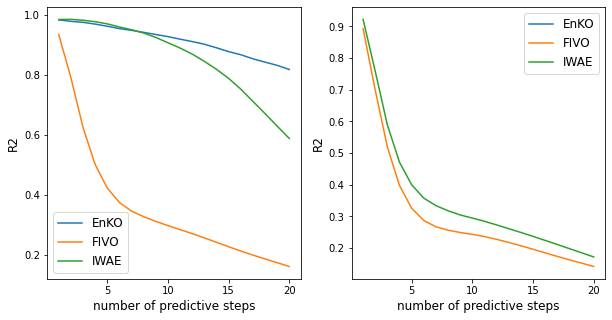

In [11]:
fs = 12
system_list = ["EnKO", "FIVO", "IWAE"]
model_list = ["SVO", "AESMC"]
pred_steps = 20
epoch = 0
R2 = np.zeros((len(system_list), len(model_list), pred_steps))

for i, system in enumerate(system_list):
    for j, model in enumerate(model_list):
        #print("s{}m{}".format(system, model), np.load("../results/201219_Allen_gs/s{}m{}/pred_evals.npy".format(system, model)).shape)
        R2[i,j] = np.load("../results/201219_Allen_gs/s{}m{}/pred_evals.npy".format(system, model))[epoch-1,3]
        #R2[i,j] = np.load("../results/201219_Allen_gs/s{}m{}/pred_evals.npy".format(system, model)).max(axis=0)[3]
R2[0,0] = np.load("../results/201118_EnKO_SVO_Allen_gs2/imRTPPif0.1/R2.npy")[epoch-1]

fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, model in enumerate(model_list):
    ax[i].plot(np.arange(1,pred_steps+1), R2[:,i].T)
    ax[i].set_xlabel("number of predictive steps", size=fs)
    ax[i].set_ylabel("R2", size=fs)
    ax[i].legend(system_list, fontsize=fs)

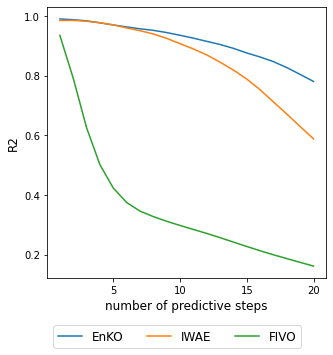

In [6]:
fs = 12
system_list = ["EnKO", "IWAE", "FIVO"]
pred_steps = 20
epoch = 0
R2 = np.zeros((len(system_list), pred_steps))
    
# R2[0] = np.load("../results/201118_EnKO_SVO_Allen_gs2/imRTPPif0.1/R2.npy")[epoch-1]
R2[0] = np.load("../results/201222_EnKO_SVO_Allen_gs/s0/pred_evals.npy")[epoch-1,3]
R2[1] = np.load("../results/201219_Allen_gs/sIWAEmSVO/pred_evals.npy")[epoch-1,3]
R2[2] = np.load("../results/201219_Allen_gs/sFIVOmSVO/pred_evals.npy")[epoch-1,3]
# R2[3] = np.load("../results/201219_Allen_gs/sFIVOmAESMC/pred_evals.npy")[epoch-1,3] #AESMC

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range(len(system_list)):
    #ax.plot(np.arange(1,pred_steps+1), R2[i], c=gray_color_list[i], ls=linestyle_list[i])
    ax.plot(np.arange(1,pred_steps+1), R2[i], c=tab_color_list[i])
ax.set_xlabel("number of predictive steps", size=fs)
ax.set_ylabel("R2", size=fs)
# ax.legend(system_list, fontsize=fs)
ax.set_xticks([5,10,15,20])
# ax.legend(system_list, fontsize=fs, loc="upper left", bbox_to_anchor=(-0.15,-0.15), ncol=4)
ax.legend(system_list, fontsize=fs, loc="upper left", bbox_to_anchor=(0.,-0.15), ncol=3)
fig.savefig("fig/R2_allen.pdf", bbox_inches="tight")

In [7]:
fs = 12
system_list = ["EnKO", "IWAE", "FIVO"]
pred_steps = 20
epoch = 0
ESS = np.zeros(len(system_list))
    
ESS[0] = np.load("../results/201222_EnKO_SVO_Allen_gs/s0/valid_loss.npy")[epoch-1,-1]
ESS[1] = np.load("../results/201219_Allen_gs/sIWAEmSVO/valid_loss.npy")[epoch-1,-1]
ESS[2] = np.load("../results/201219_Allen_gs/sFIVOmSVO/valid_loss.npy")[epoch-1,-1]
# R2[3] = np.load("../results/201219_Allen_gs/sFIVOmAESMC/pred_evals.npy")[epoch-1,3] #AESMC

print(ESS)

[12.66583204 11.9503994   9.31888199]


## Comparison for FHN Data

### Regarding inflation

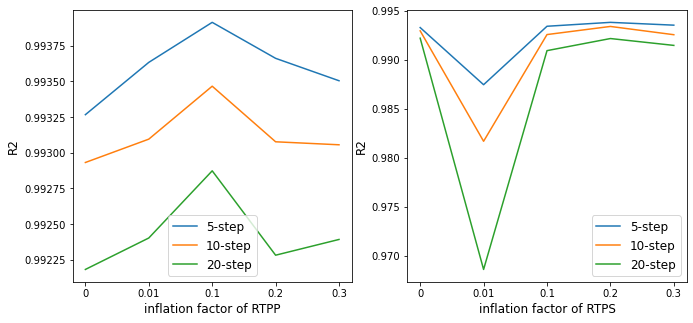

In [11]:
fs = 12
method_list = ["RTPP", "RTPS"]
factor_list = [0.01, 0.1, 0.2, 0.3]
pred_steps = 20
vis_steps = [5,10,20]
epoch = 2000
R2 = np.zeros((len(method_list), len(factor_list)+1, pred_steps))

# R2[:,0] = np.load("../results/201224_EnKO_SVO_FHN/pred_evals.npy")[epoch-1,3]
R2[:,0] = np.load("../results/201224_EnKO_SVO_FHN/pred_evals_test{}.npy".format(epoch))[3]
for i, method in enumerate(method_list):
    for j, factor in enumerate(factor_list):
        #R2[i,j+1] = np.load("../results/201222_EnKO_SVO_FHN_gs/im{}if{}/pred_evals.npy".format(method, factor))[epoch-1,3]
        R2[i,j+1] = np.load("../results/201222_EnKO_SVO_FHN_gs/im{}if{}/pred_evals_test{}.npy".format(method, factor, epoch))[3]

fig, ax = plt.subplots(1,2,figsize=(11,5))
for j, method in enumerate(method_list):
    for i, vis_step in enumerate(vis_steps):
        ax[j].plot(R2[j,:,vis_step-1], label="{}-step".format(vis_step))
    ax[j].set_xlabel("inflation factor of {}".format(method), size=fs)
    ax[j].set_ylabel("R2", size=fs)
    ax[j].set_xticks(range(5))
    ax[j].set_xticklabels([0] + factor_list)
    ax[j].legend(fontsize=fs)
fig.savefig("fig/R2_fhn_if_test.pdf", bbox_inches="tight")

### Regarding system and model

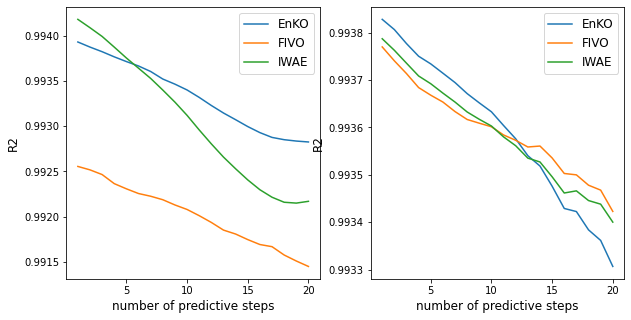

In [21]:
fs = 12
system_list = ["EnKO", "FIVO", "IWAE"]
model_list = ["SVO", "VRNN"]
pred_steps = 20
epoch = 0
R2 = np.zeros((len(system_list), len(model_list), pred_steps))

for i, system in enumerate(system_list):
    for j, model in enumerate(model_list):
        R2[i,j] = np.load("../results/201215_FHN_gs/s{}m{}/pred_evals.npy".format(system, model))[epoch-1,3]
# R2[0,0] = np.load("../results/201222_EnKO_SVO_FHN_gs/imRTPPif0.1/pred_evals.npy")[epoch-1,3]

fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, model in enumerate(model_list):
    ax[i].plot(np.arange(1,pred_steps+1), R2[:,i].T)
    ax[i].set_xlabel("number of predictive steps", size=fs)
    ax[i].set_ylabel("R2", size=fs)
    ax[i].legend(system_list, fontsize=fs)

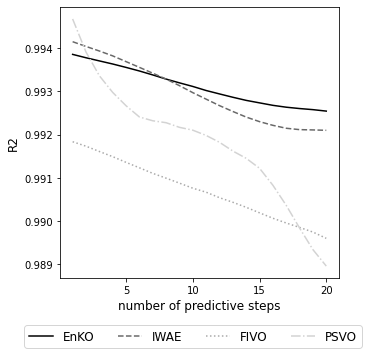

In [4]:
fs = 12
system_list = ["EnKO", "IWAE", "FIVO", "PSVO"]
pred_steps = 20
epoch = 0
R2 = np.ones((len(system_list)+1, pred_steps))

for i, system in enumerate(system_list[:3]):
    #R2[i] = np.load("../results/201215_FHN_gs/s{}mSVO/pred_evals.npy".format(system))[epoch-1,3]
    directory = "../results/201215_FHN_gs/s{}mSVO".format(system)
    R2[i] = np.load(os.path.join(directory, "pred_evals_test{}.npy".format(len(np.load(os.path.join(directory, "train_loss.npy"))))))[3]
R2[3] = np.load("../results/201010_FIVO_PSVO_FHN/R2.npy")[780]

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range(len(system_list)):
    ax.plot(np.arange(1,pred_steps+1), R2[i], c=gray_color_list[i], ls=linestyle_list[i])
#     ax.plot(np.arange(1,pred_steps+1), R2[i], c=tab_color_list[i])
ax.set_xlabel("number of predictive steps", size=fs)
ax.set_ylabel("R2", size=fs)
# ax.legend(system_list, fontsize=fs)
ax.legend(system_list, fontsize=fs, loc="upper left", bbox_to_anchor=(-0.15,-0.15), ncol=4)
ax.set_xticks([5,10,15,20])
fig.savefig("fig/R2_fhn_test_gray.pdf", bbox_inches="tight")

In [9]:
fs = 12
system_list = ["EnKO", "IWAE", "FIVO", "PSVO"]
pred_steps = 20
epoch = 0
ESS = np.zeros(len(system_list))

for i, system in enumerate(system_list[:3]):
    ESS[i] = np.load("../results/201215_FHN_gs/s{}mSVO/valid_loss.npy".format(system))[epoch-1,-1]
ESS[3] = np.load("../results/210109_FIVO_PSVO_FHN/valid_loss.npy")[epoch-1,-1]

ESS

array([14.69968605, 14.15586662, 12.423388  ,  1.04066911])

EnKO-SVO, tr:2000
EnKO-VRNN, tr:2000
FIVO-SVO, tr:2000
FIVO-VRNN, tr:2000
IWAE-SVO, tr:2000
IWAE-VRNN, tr:2000


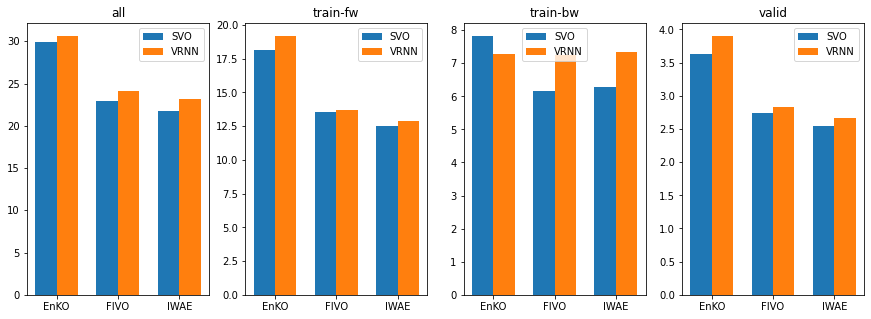

In [6]:
fs = 12
width = 0.35
system_list = ["EnKO", "FIVO", "IWAE"]
model_list = ["SVO", "VRNN"]
epoch = 2000
times = np.zeros((len(system_list), len(model_list), 2000, 4))

for i, system in enumerate(system_list):
    for j, model in enumerate(model_list):
        tr = np.load("../results/201215_FHN_gs/s{}m{}/time_record.npy".format(system, model))
        print("{}-{}, tr:{}".format(system, model, tr.shape[0]))
        times[i,j,:tr.shape[0]] = tr

fig, ax = plt.subplots(1,4,figsize=(15,5))
for j, name in enumerate(["all", "train-fw", "train-bw", "valid"]):
    for i, model in enumerate(model_list):
        ax[j].bar(np.arange(len(system_list)) - width/2 + i*width, times[:,i,:,j].mean(axis=1), width, label=model)
    ax[j].set_xticks(range(len(system_list)))
    ax[j].set_xticklabels(system_list)
    ax[j].set_title(name)
    ax[j].legend()

EnKO-SVO, tr:2000
EnKO-VRNN, tr:2000
FIVO-SVO, tr:2000
FIVO-VRNN, tr:2000
IWAE-SVO, tr:2000
IWAE-VRNN, tr:2000


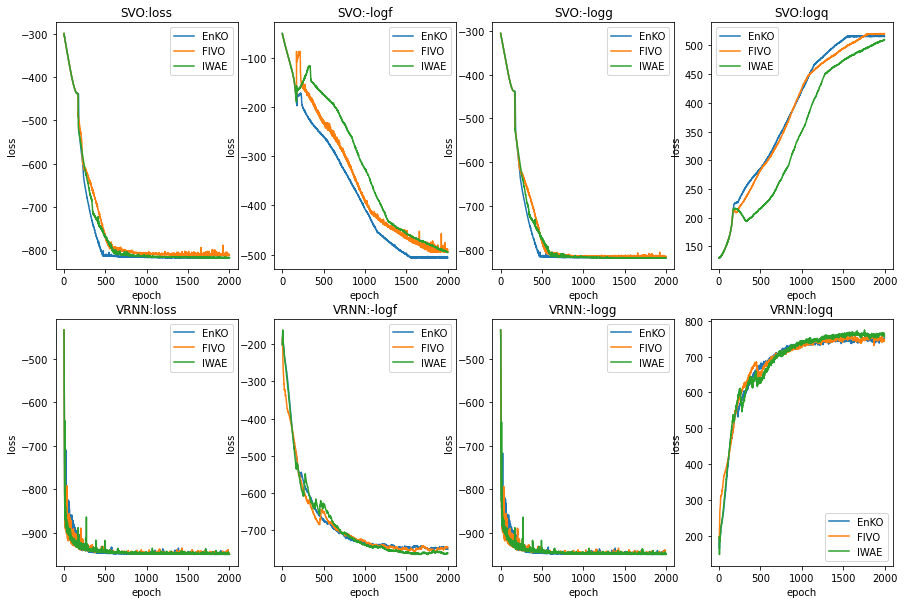

In [11]:
fs = 12
width = 0.35
system_list = ["EnKO", "FIVO", "IWAE"]
model_list = ["SVO", "VRNN"]
epoch = 2000
loss = np.zeros((len(system_list), len(model_list), 2000, 4))

for i, system in enumerate(system_list):
    for j, model in enumerate(model_list):
        tr = np.load("../results/201215_FHN_gs/s{}m{}/valid_loss.npy".format(system, model))[:,:4]
        print("{}-{}, tr:{}".format(system, model, tr.shape[0]))
        loss[i,j,:tr.shape[0]] = tr

fig, ax = plt.subplots(2,4,figsize=(15,10))
for k, name in enumerate(["loss", "-logf", "-logg", "logq"]):
    for i, model in enumerate(model_list):
        for j, system in enumerate(system_list):
            ax[i,k].plot(loss[j,i,:,k], label=system)
        ax[i,k].set_title("{}:{}".format(model, name))
        ax[i,k].set_xlabel("epoch")
        ax[i,k].set_ylabel("loss")
        ax[i,k].legend()

## Comparison for Lorenz Data

### Regarding inflation

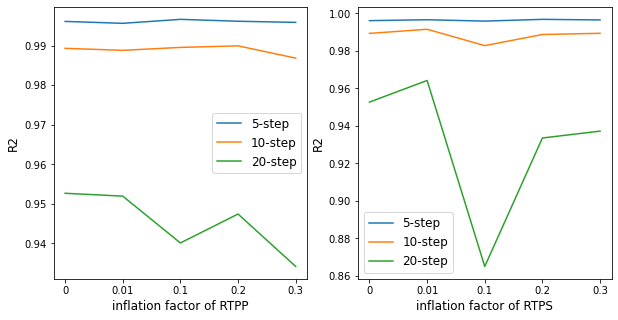

In [5]:
fs = 12
method_list = ["RTPP", "RTPS"]
factor_list = [0.01, 0.1, 0.2, 0.3]
pred_steps = 20
vis_steps = [5,10,20]
epoch = 0
R2 = np.zeros((len(method_list), len(factor_list)+1, pred_steps))

# R2[:,0] = np.load("../results/210104_EnKO_SVO_Lorenz/pred_evals.npy")[epoch-1,3]
R2[:,0] = np.load("../results/210104_EnKO_SVO_Lorenz/pred_evals_test1730.npy")[3]
for i, method in enumerate(method_list):
    for j, factor in enumerate(factor_list):
        #R2[i,j+1] = np.load("../results/210102_EnKO_SVO_Lorenz_gs/im{}if{}/pred_evals.npy".format(method, factor))[epoch-1,3]
        directory = "../results/210102_EnKO_SVO_Lorenz_gs/im{}if{}".format(method, factor)
        R2[i,j+1] = np.load(os.path.join(directory, "pred_evals_test{}.npy".format(len(np.load(os.path.join(directory, "train_loss.npy"))))))[3]

fig, ax = plt.subplots(1,2,figsize=(10,5))
for j, method in enumerate(method_list):
    for i, vis_step in enumerate(vis_steps):
        ax[j].plot(R2[j,:,vis_step-1], label="{}-step".format(vis_step))
    ax[j].set_xlabel("inflation factor of {}".format(method), size=fs)
    ax[j].set_ylabel("R2", size=fs)
    ax[j].set_xticks(range(5))
    ax[j].set_xticklabels([0] + factor_list)
    ax[j].legend(fontsize=fs)
fig.savefig("fig/R2_lorenz_if_test.pdf", bbox_inches="tight")

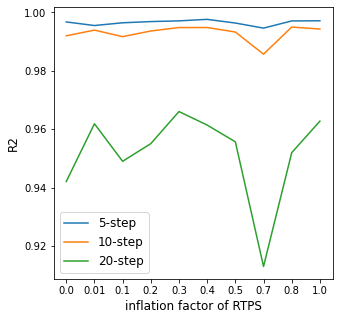

In [11]:
fs = 12
factor_list = [0., 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 1.0]
pred_steps = 20
vis_steps = [5,10,20]
epoch = 0
R2 = np.zeros((len(factor_list), pred_steps))

R2[0] = np.load("../results/210104_EnKO_SVO_Lorenz/pred_evals.npy")[epoch-1,3]
for j, factor in enumerate(factor_list[1:5]):
    R2[j+1] = np.load("../results/210102_EnKO_SVO_Lorenz_gs/imRTPSif{}/pred_evals.npy".format(factor))[epoch-1,3]
for j, factor in enumerate(factor_list[5:]):
    R2[j+5] = np.load("../results/210104_EnKO_SVO_Lorenz_gs/if{}/pred_evals.npy".format(factor))[epoch-1,3]

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i, vis_step in enumerate(vis_steps):
    ax.plot(R2[:,vis_step-1], label="{}-step".format(vis_step))
ax.set_xlabel("inflation factor of RTPS", size=fs)
ax.set_ylabel("R2", size=fs)
ax.set_xticks(range(len(factor_list)))
ax.set_xticklabels(factor_list)
ax.legend(fontsize=fs)
# fig.savefig("fig/R2_lorenz_rtps.pdf", bbox_inches="tight")

### Regarding n_particles

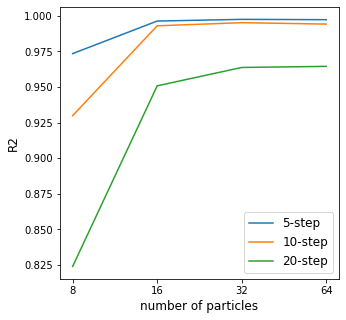

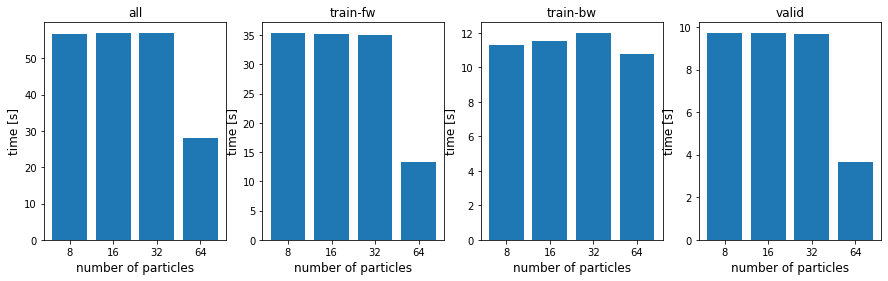

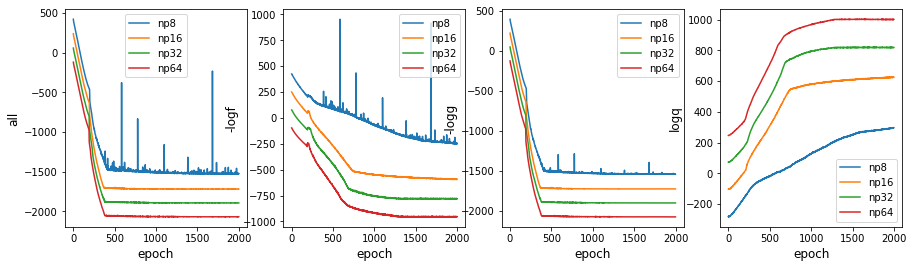

In [9]:
fs = 12
np_list = [8,16,32,64]
pred_steps = 20
vis_steps = [5,10,20]
epoch = 2000
R2 = np.zeros((len(np_list), pred_steps))
times = np.zeros((len(np_list), 4))
loss = np.zeros((len(np_list), epoch, 4))

for i, n_particles in enumerate(np_list):
    R2[i] = np.load("../results/210105_EnKO_SVO_Lorenz_gs/np{}/pred_evals.npy".format(n_particles))[epoch-1,3]
    times[i] = np.load("../results/210105_EnKO_SVO_Lorenz_gs/np{}/time_record.npy".format(n_particles)).mean(axis=0)
    loss[i] = np.load("../results/210105_EnKO_SVO_Lorenz_gs/np{}/valid_loss.npy".format(n_particles))[:,:4]

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i, vis_step in enumerate(vis_steps):
    ax.plot(R2[:,vis_step-1], label="{}-step".format(vis_step))
ax.set_xlabel("number of particles", size=fs)
ax.set_ylabel("R2", size=fs)
ax.set_xticks(range(len(np_list)))
ax.set_xticklabels(np_list)
ax.legend(fontsize=fs)

fig, ax = plt.subplots(1,4,figsize=(15,4))
for i, name in enumerate(["all", "train-fw", "train-bw", "valid"]):
    ax[i].bar(np.arange(len(np_list)), times[:,i])
    ax[i].set_xlabel("number of particles", size=fs)
    ax[i].set_ylabel("time [s]", size=fs)
    ax[i].set_xticks(range(len(np_list)))
    ax[i].set_xticklabels(np_list)
    ax[i].set_title(name)
    
fig, ax = plt.subplots(1,4,figsize=(15,4))
for i, name in enumerate(["all", "-logf", "-logg", "logq"]):
    for j, n_particles in enumerate(np_list):
        ax[i].plot(loss[j,:,i], label="np{}".format(n_particles))
    ax[i].set_xlabel("epoch", size=fs)
    ax[i].set_ylabel(name, size=fs)
    ax[i].legend()

# fig.savefig("fig/R2_lorenz_if.pdf", bbox_inches="tight")

### Regarding system and model

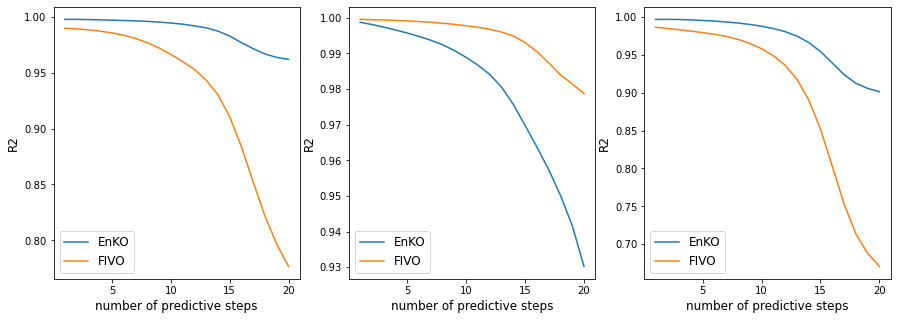

In [12]:
fs = 12
system_list = ["EnKO", "FIVO"]
model_list = ["SVO", "VRNN", "AESMC"]
pred_steps = 20
epoch = 0
R2 = np.zeros((len(system_list), len(model_list), pred_steps))

for i, system in enumerate(system_list):
    for j, model in enumerate(model_list):
        R2[i,j] = np.load("../results/210102_Lorenz_gs/m{}s{}/pred_evals.npy".format(model, system))[epoch-1,3]
# R2[0,0] = np.load("../results/201222_EnKO_SVO_FHN_gs/imRTPPif0.1/pred_evals.npy")[epoch-1,3]

fig, ax = plt.subplots(1,3,figsize=(15,5))
for i, model in enumerate(model_list):
    ax[i].plot(np.arange(1,pred_steps+1), R2[:,i].T)
    ax[i].set_xlabel("number of predictive steps", size=fs)
    ax[i].set_ylabel("R2", size=fs)
    ax[i].legend(system_list, fontsize=fs)

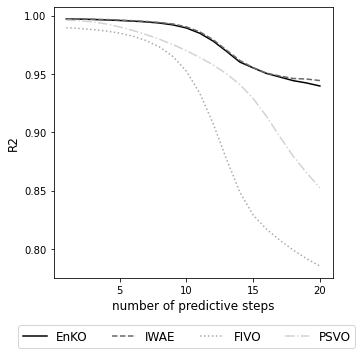

In [5]:
fs = 12
system_list = ["EnKO", "IWAE", "FIVO", "PSVO"]
pred_steps = 20
epoch = 0
R2 = np.ones((len(system_list), pred_steps))

# R2[0] = np.load("../results/210102_Lorenz_gs/mSVOsEnKO/pred_evals.npy")[epoch-1,3]
# R2[0] = np.load("../results/210102_EnKO_SVO_Lorenz_gs/imRTPSif0.3/pred_evals.npy")[epoch-1,3]
# R2[1] = np.load("../results/210104_IWAE_SVO_Lorenz/pred_evals.npy")[epoch-1,3]
# R2[2] = np.load("../results/210102_Lorenz_gs/mSVOsFIVO/pred_evals.npy")[epoch-1,3]
R2[0] = np.load("../results/210102_Lorenz_gs/mSVOsEnKO/pred_evals_test1540.npy")[3]
# R2[0] = np.load("../results/210102_EnKO_SVO_Lorenz_gs/imRTPSif0.01/pred_evals_test2000.npy")[3]
R2[1] = np.load("../results/210104_IWAE_SVO_Lorenz/pred_evals_test1535.npy")[3]
R2[2] = np.load("../results/210102_Lorenz_gs/mSVOsFIVO/pred_evals_test2000.npy")[3]
R2[3] = np.load("../results/201001_FIVO_PSVO_Lorenz/R2.npy")[-1]

fig, ax = plt.subplots(1,1,figsize=(5,5))
for i in range(len(system_list)):
    ax.plot(np.arange(1,pred_steps+1), R2[i], c=gray_color_list[i], ls=linestyle_list[i])
#     ax.plot(np.arange(1,pred_steps+1), R2[i], c=tab_color_list[i])
ax.set_xlabel("number of predictive steps", size=fs)
ax.set_ylabel("R2", size=fs)
# ax.legend(system_list, fontsize=fs)
ax.legend(system_list, fontsize=fs, loc="upper left", bbox_to_anchor=(-0.15,-0.15), ncol=4)
ax.set_xticks([5,10,15,20])
fig.savefig("fig/R2_lorenz_test_gray.pdf", bbox_inches="tight")

In [10]:
fs = 12
system_list = ["EnKO", "IWAE", "FIVO", "PSVO"]
pred_steps = 20
epoch = 0
ESS = np.ones(len(system_list))

ESS[0] = np.load("../results/210102_Lorenz_gs/mSVOsEnKO/valid_loss.npy")[epoch-1,-1]
ESS[1] = np.load("../results/210104_IWAE_SVO_Lorenz/valid_loss.npy")[epoch-1,-1]
ESS[2] = np.load("../results/210102_Lorenz_gs/mSVOsFIVO/valid_loss.npy")[epoch-1,-1]
ESS[3] = np.load("../results/210109_FIVO_PSVO_Lorenz/valid_loss.npy")[epoch-1,-1]

ESS

array([13.15280914, 13.02610238,  9.65369701,  1.47780546])